<a href="https://colab.research.google.com/github/Rushabh2499/CodersWeek-ML/blob/master/ML_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
!wget http://iali.in/datasets/mushrooms.csv

--2020-06-04 06:33:09--  http://iali.in/datasets/mushrooms.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374003 (365K) [text/plain]
Saving to: ‘mushrooms.csv.1’

mushrooms.csv.1     100%[===================>] 365.24K  1.18MB/s    in 0.3s    

2020-06-04 06:33:10 (1.18 MB/s) - ‘mushrooms.csv.1’ saved [374003/374003]



In [0]:
dataset = pd.read_csv("http://iali.in/datasets/mushrooms.csv")

In [0]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [0]:
#a1 = pd.DataFrame({'clas':dataset.iloc[:,0].values})
#b1 = pd.DataFrame({'class':dataset.iloc[:,1].values})
#c1 = pd.DataFrame({'class':dataset.iloc[:,2].values})
#d1 = pd.DataFrame({'class':dataset.iloc[:,3].values})
#e1 = pd.DataFrame({'class':dataset.iloc[:,4].values})



#from sklearn import preprocessing 
#label_encoder = preprocessing.LabelEncoder() 

#a1["class"]= label_encoder.fit_transform(a1["clas"])
#b1["cap-shape"]= label_encoder.fit_transform(b1["class"])
#c1["cap-surface"]= label_encoder.fit_transform(c1["class"])
#d1["cap-color"]= label_encoder.fit_transform(d1["class"])
#e1["bruises"]= label_encoder.fit_transform(e1["class"])



#b = b1.iloc[:,1].values
#c = c1.iloc[:,1].values
#d = d1.iloc[:,1].values
#a = a1.iloc[:,1].values
#e = e1.iloc[:,1].values


#m=np.array([b,c,d,e,])
#n=a
#m=np.transpose(x)


In [0]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

for col in dataset.columns:
  dataset[col] = labelencoder.fit_transform(dataset[col])

x = dataset.iloc[:,2:20]
y = dataset.iloc[:,0]

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

[Text(122.98775510204082, 209.6742857142857, 'X[7] <= 3.5\ngini = 0.5\nsamples = 6499\nvalue = [3350, 3149]'),
 Text(81.99183673469388, 194.14285714285714, 'X[9] <= 1.5\ngini = 0.267\nsamples = 2640\nvalue = [419, 2221]'),
 Text(68.3265306122449, 178.61142857142858, 'X[16] <= 1.5\ngini = 0.116\nsamples = 2367\nvalue = [146, 2221]'),
 Text(40.99591836734694, 163.07999999999998, 'X[11] <= 0.5\ngini = 0.006\nsamples = 2209\nvalue = [7, 2202]'),
 Text(27.33061224489796, 147.54857142857142, 'X[9] <= 0.5\ngini = 0.263\nsamples = 45\nvalue = [7, 38]'),
 Text(13.66530612244898, 132.01714285714286, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(40.99591836734694, 132.01714285714286, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(54.66122448979592, 147.54857142857142, 'gini = 0.0\nsamples = 2164\nvalue = [0, 2164]'),
 Text(95.65714285714286, 163.07999999999998, 'X[9] <= 0.5\ngini = 0.212\nsamples = 158\nvalue = [139, 19]'),
 Text(81.99183673469388, 147.54857142857142, 'gini = 0.0\nsample

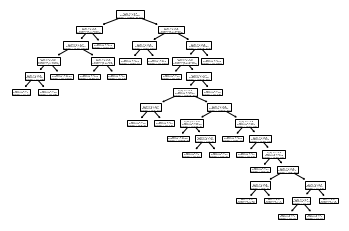

In [64]:
tree.plot_tree(clf)

In [0]:
y_pred = clf.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9987692307692307

In [60]:
from sklearn.metrics import classification_report

classes = ['0','1']

classification_report(y_test, y_pred, target_names=classes)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99       831\n           1       1.00      0.99      0.99       794\n\n    accuracy                           0.99      1625\n   macro avg       0.99      0.99      0.99      1625\nweighted avg       0.99      0.99      0.99      1625\n'

In [67]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
4276,0,0
4359,1,1
4907,1,1
3593,0,0
5364,1,1
...,...,...
681,0,0
4393,1,1
4118,1,1
7275,1,1
